In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## 1. Write the hypothesis function for linear regression in vector form.

In [3]:
def linear_regression_hypothesis(X, theta):
    """
    Hypothesis function for linear regression.

    This function calculates the predictions based on the vector product between the feature matrix and the coefficients vector.

    Parameters:
    X : np.array
        Feature matrix where each row represents a training example and each column represents a feature. 
        Typically, X includes a column of ones as the first column for the intercept term.
    theta(W) : np.array
        Coefficients vector (also known as weights or theta) for the regression. 
        This includes the intercept term as its first element if the feature matrix X has a column of ones.

    Returns:
    np.array
        Predicted values as a result of the hypothesis function applied on the feature matrix and coefficients vector.
    """
    return np.dot(X, theta)

In [4]:
## 2. Create a function to compute the loss function in vector form.

In [5]:
def mean_squared_error(theta, X, Y):
    """
    Calculates the Mean Squared Error (MSE) for a linear regression model.

    Parameters:
    theta (numpy array): Vector of model parameters.
    X (numpy array): Matrix of input features.
    Y (numpy array): Vector of actual values.

    Returns:
    float: The calculated MSE value.

    Note: This function assumes that 'linear_regression_hypothesis' is a separate function 
    that computes the hypothesis of linear regression, i.e., the predicted values.
    """
    m = len(Y)
    h = linear_regression_hypothesis(X, theta)
    squared_errors = (H - Y) ** 2
    mse = np.sum(squared_erros) / (2 * m)
    return mse

In [6]:
## 3. Implement one step of gradient descent.

In [7]:
def gradient_descent_step(X, Y, theta, learning_rate, num_iterations):
    """
    Performs gradient descent to learn theta

    Parameters:
    X (numpy array): Matrix of input features.
    Y (numpy array): Vector of actual values.
    theta (numpy array): Initial values of model parameters.
    learning_rate (float): Learning rate.
    num_iterations (int): Number of iterations.

    Returns:
    numpy array: Updated model parameter values after gradient descent.
    """
    m = len(Y)  # number of observations

    for i in range(num_iterations):
        predictions = X.dot(theta)  # vector of predictions
        errors = predictions - Y  # vector of errors
        gradient = (1 / m) * X.T.dot(errors)  # gradient of the loss function
        theta = theta - learning_rate * gradient  # update parameters

    return theta


In [8]:
## 4. Find the best parameters vector for the dataset predicting house price based on area, number of bathrooms, and number of bedrooms

In [9]:
housing_data = pd.read_csv("D:/DS-GOIT/ds-hw-3/Housing.csv")
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
# Selection of Features and Target Variable
X = housing_data[['area', 'bedrooms', 'bathrooms']]
Y = housing_data['price']

In [11]:
X = (X - X.mean()) / X.std()

In [12]:
# Adding a Column of Ones to X to Account for the Intercept Term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [13]:
# Execution of Gradient Descent
learning_rate = 0.01
num_iterations = 1000
theta = np.zeros(X.shape[1])
theta_gradient_descent = gradient_descent_step(X, Y, theta, learning_rate, num_iterations)

In [14]:
# Analytical Solution Using the Normal Equation
lambda_ = 1  # Regularization Parameter
I = np.eye(X.shape[1])
theta_analytical = np.linalg.inv(X.T.dot(X) + lambda_ * I).dot(X.T).dot(Y)

In [15]:
# Comparison of Results
print('Parameters Obtained Using Gradient Descent:', theta_gradient_descent)
print('Parameters Obtained Analytically:', theta_analytical)

Parameters Obtained Using Gradient Descent: [4766523.46205873  821953.24685936  300575.90579754  696151.64754558]
Parameters Obtained Analytically: [4757998.97435897  820655.68700728  300294.29345439  695410.76078768]


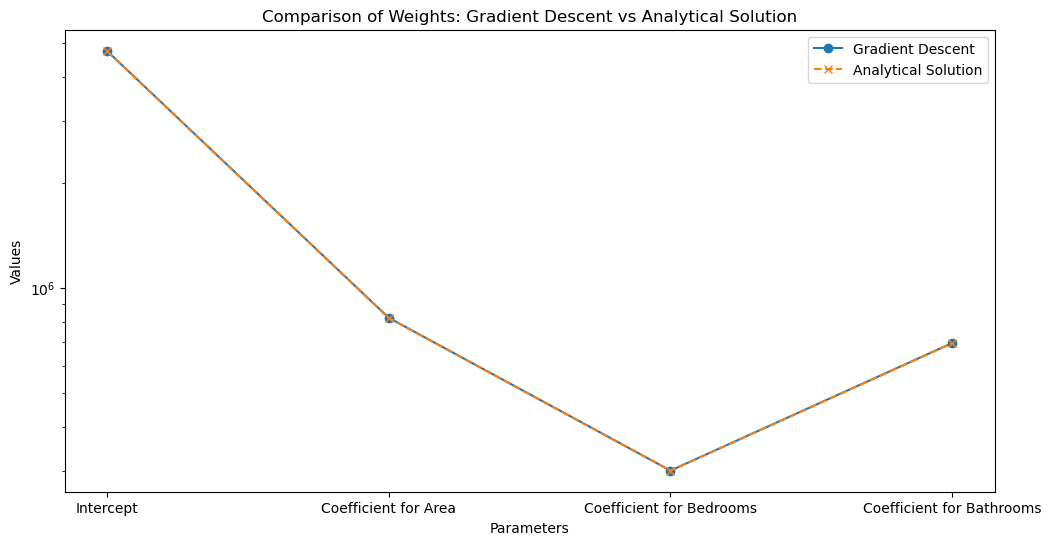

In [16]:
parameters = ['Intercept', 'Coefficient for Area', 'Coefficient for Bedrooms', 'Coefficient for Bathrooms']
gd_values = theta_gradient_descent
analytical_values = theta_analytical

plt.figure(figsize=(12, 6))

plt.plot(parameters, gd_values, label='Gradient Descent', marker='o')
plt.plot(parameters, analytical_values, label='Analytical Solution', linestyle='dashed', marker='x')

plt.title('Comparison of Weights: Gradient Descent vs Analytical Solution')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.legend()
plt.yscale('log')

plt.show()

__Sklearn__

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
X = housing_data[['area', 'bedrooms', 'bathrooms']]
Y = housing_data['price']

In [19]:
# Splitting the Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
# Creating and Training a Linear Regression Model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Model Evaluation
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2750040479309.0503


In [22]:
# Using the model to predict house prices.
# Example: Predicting the price for a house with an area of 3000, 3 bedrooms, and 2 bathrooms.
example_df = pd.DataFrame([[3000, 3, 2]], columns=['area', 'bedrooms', 'bathrooms'])
predicted_price = model.predict(example_df)
print(f"Predicted Price for the house: {predicted_price[0]}")

Predicted Price for the house: 5021117.356113391


In [23]:
# Displaying Models
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [3.45466570e+02 3.60197650e+05 1.42231966e+06]
Model intercept: 59485.379208717495


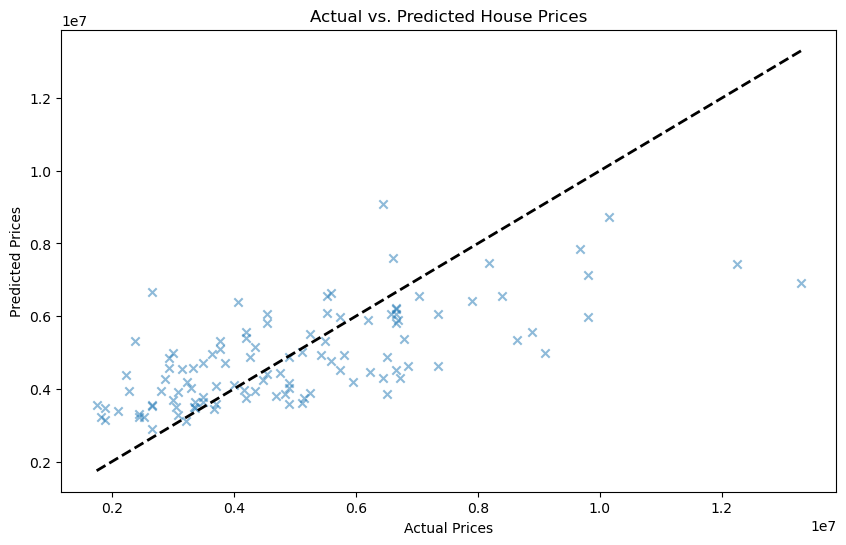

In [24]:
# Visualization of Real and Predicted House Prices from the scikit-learn Model
plt.figure(figsize=(10, 6))

plt.scatter(Y_test, Y_pred, alpha=0.5, marker='x')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()